In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from google.colab import files

In [ ]:
uploaded = files.upload()

Saving bodyPerformance.csv to bodyPerformance.csv


**Индивидуальное задание**

**Загрузка данных и предварительный просмотр**

In [ ]:
# Чтение данных из загруженного файла
dataset = pd.read_csv('bodyPerformance.csv')

# Просмотр первых строк данных
dataset.head()


,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
0,27.0,M,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C
1,25.0,M,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A
2,31.0,M,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,C
3,32.0,M,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,B
4,28.0,M,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,B


Выбор признаков

**Используем колонки age (возраст) и body fat_% (процент жира):**

In [ ]:
# Выбор нужных колонок
X = dataset[['body fat_%']].values  # Признак, независимая переменная, преобразованная в массив (values)
y = dataset['age'].values  # Целевая переменная, преобразованная в массив (values)

# Просмотр первых пяти строк
print("Матрица признаков:")
print(X[:5])
print("Целевая переменная:")
print(y[:5])


Матрица признаков:
[[21.3]
 [15.7]
 [20.1]
 [18.4]
 [17.1]]
Целевая переменная:
[27. 25. 31. 32. 28.]


**Разделение данных на тренировочную и тестовую выборки**

In [ ]:
from sklearn.model_selection import train_test_split

# Разделение данных: 75% на тренировку, 25% на тест
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)


**Обучение линейной модели регрессии**

In [ ]:
from sklearn.linear_model import LinearRegression

# Создание и обучение модели
regressor = LinearRegression() # Создается объект regressor, представляющий модель линейной регрессии.
regressor.fit(X_train, y_train)

# LinearRegression — это модель машинного обучения для решения задач регрессии,
# которая находит линейную зависимость между независимыми переменными (признаками) и зависимой переменной (целевой переменной).


LinearRegression()

**Предсказание и визуализация**

In [ ]:
# Предсказание на тестовых данных
y_pred = regressor.predict(X_test) # Использует массив тестовых признаков. Метод для вычисления предсказанных значений целевой переменной на основе данных признаков

# Вывод предсказанных значений
print("Предсказание по тестовой переменной:")
print(y_pred)


Предсказание по тестовой переменной:
[33.57986773 31.73401455 33.61832301 40.38645134 32.84921751 34.81043652
 34.65661542 32.77230696 34.11824158 39.57889058 34.04133103 33.69523356
 37.77149267 33.50295718 37.34848465 40.23263024 37.92531377 38.00222431
 33.07994916 32.27238839 34.5412496  39.96344332 35.04116817 34.0797863
 35.04116817 37.4253952  36.8101108  34.5412496  38.50214289 37.80994794
 36.46401333 32.54157532 33.04149389 35.23344454 37.57921629 35.61799729
 33.11840444 33.46450191 30.73417741 40.42490662 37.80994794 37.57921629]


**Визуализация для тренировочного набора**

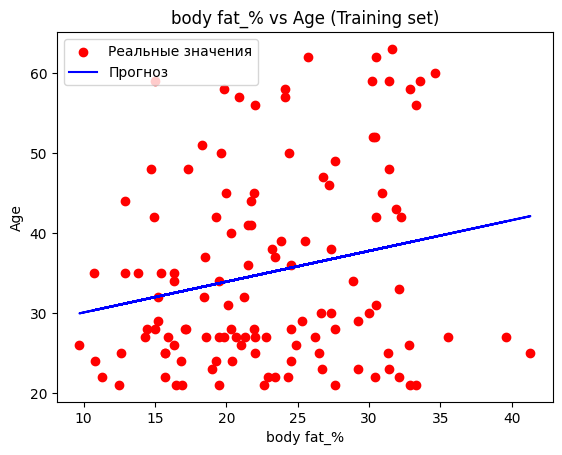

In [ ]:
# Строим диаграмму рассеяния
plt.scatter(X_train, y_train, color='red', label='Реальные значения')
# Строим линию, которая представляет предсказания модели на тренировочном наборе данных
plt.plot(X_train, regressor.predict(X_train), color='blue', label='Прогноз') # regressor.predict(X_train): Предсказанные значения целевой переменной, рассчитанные обученной моделью для тренировочных данных
plt.title('body fat_% vs Age (Training set)')
plt.xlabel('body fat_%')
plt.ylabel('Age')
plt.legend()
plt.show()


**Визуализация для тестового набора**

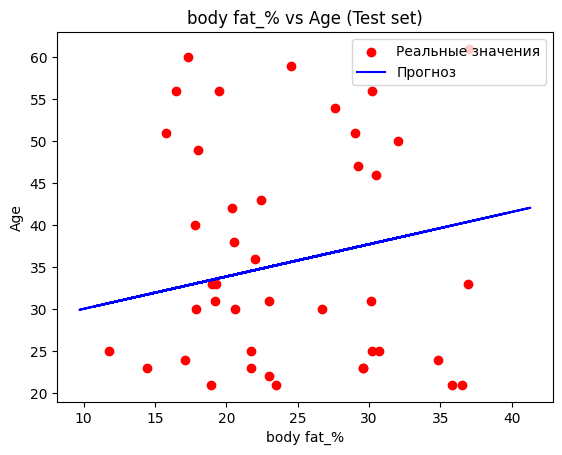

In [ ]:
# Строим диаграмму рассеяния
plt.scatter(X_test, y_test, color='red', label='Реальные значения')
# Строит линию, представляющую предсказания модели
plt.plot(X_train, regressor.predict(X_train), color='blue', label='Прогноз')
plt.title('body fat_% vs Age (Test set)')
plt.xlabel('body fat_%')
plt.ylabel('Age')
plt.legend()
plt.show()
